In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data/results.csv', usecols=['meters', 'price', 'rooms', 'dealer', 'district'], na_values=['Zapytajocenę'])

In [4]:
df.head(3)

,meters,price,rooms,dealer,district
0,61.8,369000.0,4,Ofertaprywatna,LSM
1,79.0,489000.0,3,PółnocNieruchomościFranczyza,LSM
2,60.0,375000.0,3,PrestigeBroker,Węglin


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2695 entries, 0 to 2694
Data columns (total 5 columns):
meters      2695 non-null float64
price       2537 non-null float64
rooms       2695 non-null int64
dealer      2619 non-null object
district    2695 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 105.4+ KB


In [6]:
top_dealers = pd.value_counts(df['dealer'].values)[0:30]
top_dealers

3KLUCZEs.c.                               319
CLIVUSNieruchomości                       217
FRANCZEWSKANieruchomościs.c.              154
4tepiętro                                 147
Arena                                     118
Ofertaprywatna                            101
LUKsp.zo.o.SKA                             98
BiuroNieruchomościKWADRAT                  96
HomeBrokerS.A.                             86
BIGCITYBROKER                              77
LubelskieMieszkania                        68
Lokum                                      66
LUKJacekWysokiński                         62
WMNieruchomości                            59
HERMESHOUSE                                59
ŻagielDomSp.zo.o.                          58
NieruchomościLalakPropertiesSpzo.o.SKA     48
Alfahouse                                  43
InvestorNieruchomościFranchise             41
ExpressHouse                               40
StrefaM                                    36
PółnocNieruchomościFranczyza      

In [7]:
df["district"].value_counts()[0:20]

Wrotków            345
Czuby              299
Węglinek           294
Śródmieście        198
Czechów            171
Bronowice          158
LSM                151
Felin              141
Dziesiąta          124
Centrum             97
lubelskie           87
Sławin              69
Wieniawa            67
Kośminek            59
Kalinowszczyzna     56
Sławinek            56
Ponikwoda           50
Szerokie            36
Zana                27
Bazylianówka        26
Name: district, dtype: int64

In [8]:
q = df["meters"].quantile(0.99)
df = df[df["meters"] < q]

In [9]:
df["price_m2"] = round(df["price"] / df["meters"])
df.head()

,meters,price,rooms,dealer,district,price_m2
0,61.8,369000.0,4,Ofertaprywatna,LSM,5971.0
1,79.0,489000.0,3,PółnocNieruchomościFranczyza,LSM,6190.0
2,60.0,375000.0,3,PrestigeBroker,Węglin,6250.0
3,58.5,389000.0,2,HomeBrokerS.A.,Ponikwoda,6650.0
4,56.0,379500.0,2,HomeBrokerS.A.,Czuby,6777.0


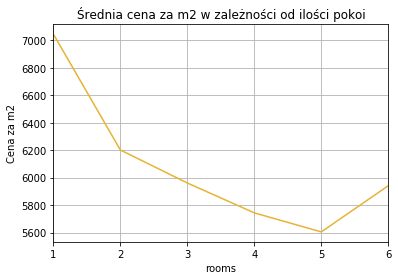

In [10]:
fig = plt.figure(1)
plt.title("Średnia cena za m2 w zależności od ilości pokoi")
plt.grid()
plt.ylabel("Cena za m2")
df["price_m2"].groupby(df["rooms"]).agg(np.mean).plot(color = (0.9,0.7,0.2))
plt.grid(True)
fig.savefig('avg_price_m2_rooms.pdf')

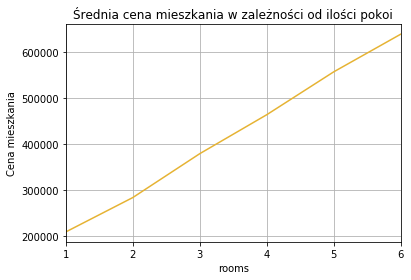

In [11]:
fig = plt.figure(2)
plt.title("Średnia cena mieszkania w zależności od ilości pokoi")
plt.ylabel("Cena mieszkania")
df["price"].groupby(df["rooms"]).agg(np.mean).plot(color = (0.9,0.7,0.2))
plt.grid(True)
fig.savefig('avg_price_rooms.pdf')

/home/adsum/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/adsum/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


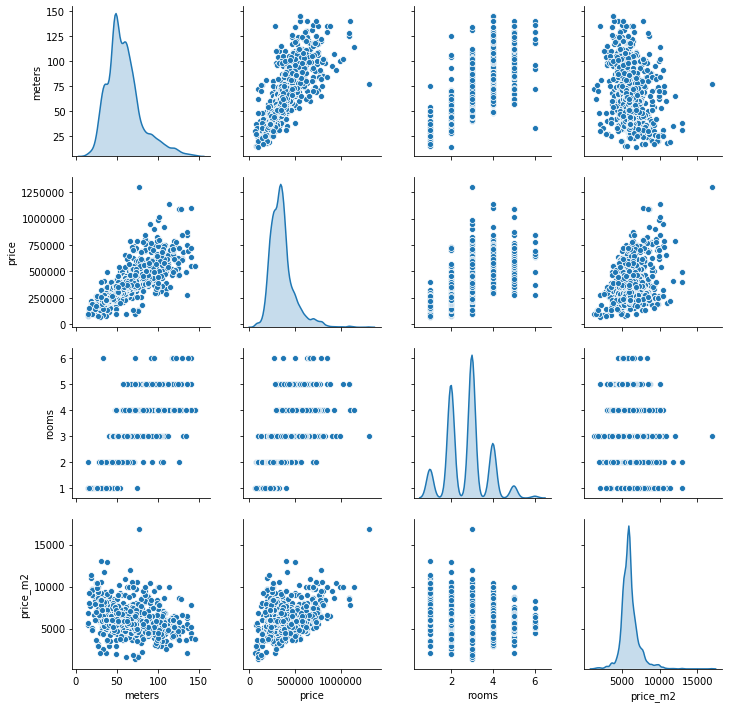

In [12]:
sns.pairplot(df,diag_kind="kde")

In [39]:
counts = df['price_m2'].groupby([df['dealer'], df['district'], df['rooms']]).count()

In [40]:
round(counts)

dealer             district      rooms
3KLUCZEs.c.        Bazylianówka  3         1
                                 5         1
                   Bronowice     2         3
                                 3        15
                                 4         3
                                          ..
ŻagielDomSp.zo.o.  Wrotków       3        20
                                 4         6
                   Węglin        3         7
                                 4         1
                   lubelskie     3         4
Name: price_m2, Length: 1111, dtype: int64

In [41]:
means = df['price_m2'].groupby([df['dealer'], df['district'], df['rooms']]).mean()

In [43]:
round(means)

dealer             district      rooms
3KLUCZEs.c.        Bazylianówka  3        5952.0
                                 5        5633.0
                   Bronowice     2        5400.0
                                 3        5460.0
                                 4        5400.0
                                           ...  
ŻagielDomSp.zo.o.  Wrotków       3        5698.0
                                 4        5700.0
                   Węglin        3        5436.0
                                 4        5500.0
                   lubelskie     3        5471.0
Name: price_m2, Length: 1111, dtype: float64